In [9]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
csvPath = os.path.expanduser("~/Desktop")
df = pd.read_csv(f"{csvPath}/FreeAgents.csv", sep=";")

In [3]:
# Initialize our output column with zeros. Then specify the categories of stats to loop over. Choose the extra weight for the most important columns.
df["FantasyPoints"] = np.zeros(len(df["RANK"]))
categories = ["MIN" , "PTS", "AST", "REB", "BLK", "STL", "TO", "FG%", "3PM", "FT%"]
ExtraWeight = 2

for categorie in categories:
    if categorie == "TO":
        i = 0
        tempStore = []
        df = df.sort_values(categorie, ascending=True)

        while i < len(df["RANK"]):
            tempStore.append(df.iloc[i,16]+ len(df["RANK"]) - i)
            i += 1

        df["FantasyPoints"] = tempStore
        tempStore.clear()   
    if categorie == "MIN":
        i = 0
        tempStore = []
        df = df.sort_values(categorie, ascending=False)

        while i < len(df["RANK"]):
            tempStore.append(df.iloc[i,16]+ ExtraWeight * len(df["RANK"]) - ExtraWeight * i)
            i += 1

        df["FantasyPoints"] = tempStore
        tempStore.clear()
    else:
        i = 0
        tempStore = []
        df = df.sort_values(categorie, ascending=False)

        while i < len(df["RANK"]):
            tempStore.append(df.iloc[i,16]+ len(df["RANK"]) - i)
            i += 1

        df["FantasyPoints"] = tempStore
        tempStore.clear()   

df = df.sort_values("FantasyPoints", ascending=False)

In [7]:
tempStore = []
maxFantasyPoints = len(categories) * len(df["RANK"])

i = 0
while i <  len(df["RANK"]):
    tempStore.append(round(df.iloc[i,16] / maxFantasyPoints, 3))
    i += 1
    
df["FantasyPoints%"] = tempStore
df = df.sort_values("FantasyPoints", ascending=False)
tempStore.clear()

TypeError: Could not convert 34.332.234.231.827.229.330.331.129.727.027.029.830.329.129.824.528.630.634.028.831.828.827.822.026.425.428.424.826.124.127.123.318.830.014.722.623.024.125.422.620.824.419.721.618.710.7-------- to numeric

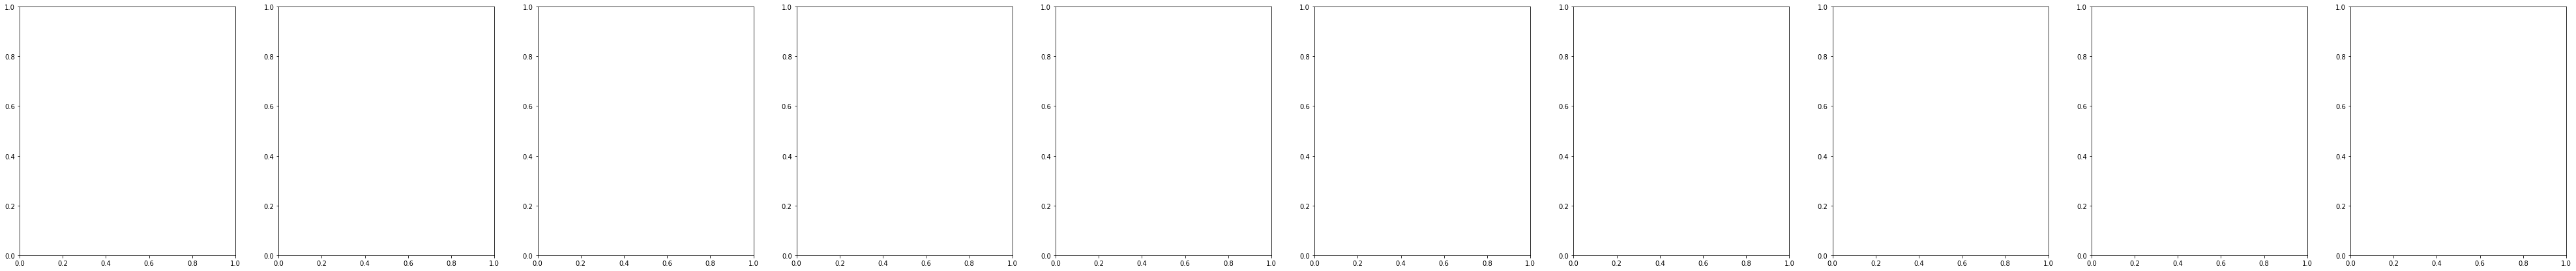

In [12]:
height = 7
width = len(categories) * height
fig, axs = plt.subplots(ncols=len(categories), figsize= (width, height))
for index, categorie in enumerate(categories):
    sns.regplot(x=df[categorie], y=df["FantasyPoints"], ax=axs[index])
    

In [8]:
df

,RANK,MIN,FGM/FGA,FG%,FTM/FTA,FT%,3PM,REB,AST,STL,BLK,TO,PTS,PR15,%OWN,+/-,FantasyPoints,FantasyPoints%
32,33,34.3,6.7/16.6,405,3.0/3.4,875,2.7,4.4,2.7,1.0,1.0,2.1,19.1,0.95,50.3,0.0,442.0,0.884
25,26,32.2,7.7/14.4,531,2.0/2.4,818,2.4,6.0,2.8,0.6,0.7,2.7,19.8,6.22,62.2,0.0,433.0,0.866
13,14,34.2,4.0/8.8,456,0.8/1.0,778,1.9,6.3,3.7,1.2,0.8,2.2,10.7,4.01,69.6,0.0,420.0,0.840
3,4,31.8,5.6/13.3,425,2.8/3.1,880,1.3,4.4,3.3,1.3,0.5,1.5,15.3,3.42,82.4,0.0,411.0,0.822
39,40,27.2,5.9/10.0,589,1.4/2.1,684,2.3,6.0,3.0,1.3,0.9,1.3,15.6,8.21,45.5,0.0,407.0,0.814
21,22,29.3,6.0/11.4,525,1.0/1.6,636,1.3,8.4,2.0,1.3,0.6,2.4,14.3,2.05,66.5,0.0,383.0,0.766
5,6,30.3,6.5/14.5,448,2.1/3.3,654,1.4,2.3,3.8,1.0,0.4,3.4,16.5,-2.10,79.4,0.0,372.0,0.744
27,28,31.1,5.3/12.4,425,2.1/3.0,714,2.6,5.3,0.6,0.6,1.0,1.0,15.3,1.46,61.4,0.0,363.0,0.726
7,8,29.7,7.3/12.9,569,2.1/4.0,528,0.0,8.7,2.3,1.2,0.3,1.1,16.8,1.97,77.5,0.0,361.0,0.722
23,24,27.0,6.0/10.5,571,2.0/2.0,1.000,2.5,5.0,3.0,0.5,1.0,1.5,16.5,-2.73,64.8,0.0,358.0,0.716


In [10]:
df.to_csv(path_or_buf=f"{csvPath}/FreeAgents_Output_{time.time()}.csv", sep=";")